# 1. Load dataloaders 
> With `CLAHE`

In [30]:
from data.dataloader import create_dataloaders

train_dataloader, val_dataloader = create_dataloaders(
    healthy_dir= "../project_datasets/drawing/Healthy/",
    pd_dir= "../project_datasets/drawing/Parkinson/",
    
    img_size=(224, 224),
    batch_size= 32,
)

Train dataset size: 2611
Validation dataset size: 653
-----------------------------------
Train dataloader size: 81
Validation dataloader size: 21


# 2. Load model

In [5]:
from Models import model_densenet201

model = model_densenet201.create_densenet()
model_name = "DenseNet201"

# 3. Train models

In [ ]:
from training.trainer import train


train(
    model= model,
    train_dataloader=  train_dataloader,
    val_dataloader=  val_dataloader,
    
    model_name= model_name,
    run_name= "DenseNet201_finetuning",
    
    load_pretrained="checkpoints/Phase TWO/DenseNet201.pth",
    epochs= 50
)

In [7]:
!tensorboard --logdir=runs

^C


# 4. Plot confusion matrix (of the best model)

In [13]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load model
checkpoint = torch.load("checkpoints/Phase TWO/DenseNet201_finetuned.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

print(f"Loaded pretrained model:")
print(f"- val_loss={checkpoint['val_loss']:.4f}")
print(f"- val_acc={checkpoint['val_acc']:.4f}")

Loaded pretrained model:
- val_loss=0.4913
- val_acc=0.8937


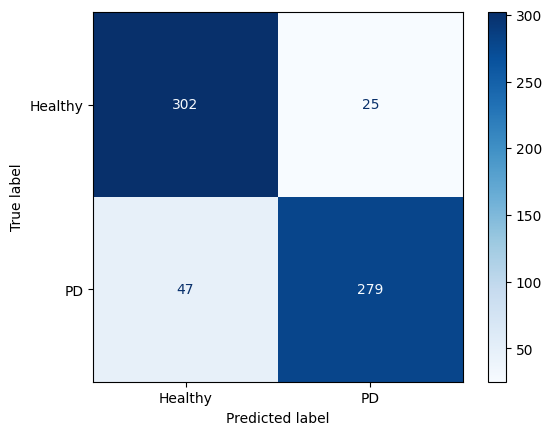

In [31]:
from training.confusion_mat import plot_confusion_matrix

plot_confusion_matrix(
    model=model,
    dataloader=val_dataloader,
    device=device,
    class_names=["Healthy", "PD"],
    # threshold=0.49,
)